C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\saahi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


Top 15 Rules by Support:
                                               antecedents  \
523249                             (Respiratory diseases)   
0                     (Vascular and unspecified dementia)   
523233                          (Diabetes, Renal failure)   
523232              (Circulatory diseases, Renal failure)   
523231          (Alzheimer disease, Respiratory diseases)   
523230                      (Alzheimer disease, Diabetes)   
523229          (Circulatory diseases, Alzheimer disease)   
523228                 (Alzheimer disease, Renal failure)   
523227  (Intentional and unintentional injury, poisoni...   
523226  (Intentional and unintentional injury, poisoni...   
523225  (Intentional and unintentional injury, poisoni...   
523224  (Intentional and unintentional injury, poisoni...   
523223  (Intentional and unintentional injury, poisoni...   
523222                    (Respiratory diseases, Obesity)   
523221                                (Diabetes, Obesity)  

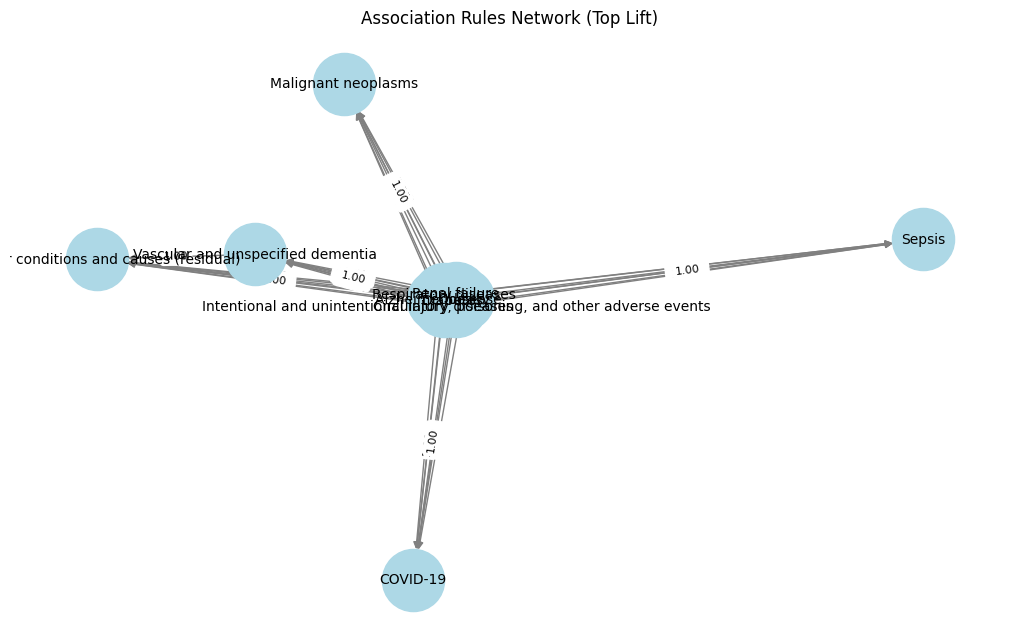

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('fixed.csv')

df_filtered = df[['State', 'Condition Group', 'ICD10_codes']]

basket = df_filtered.groupby(['State'])['Condition Group'].apply(set).reset_index()

condition_list = list(set(df_filtered['Condition Group']))
for condition in condition_list:
    basket[condition] = basket['Condition Group'].apply(lambda x: 1 if condition in x else 0)

basket.drop(columns=['Condition Group'], inplace=True)

output_path = "fixed2.csv"
basket.to_csv(output_path, index=False)

min_support = 0.02  
frequent_itemsets = apriori(basket.iloc[:, 1:], min_support=min_support, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

top_support = rules.sort_values(by="support", ascending=False).head(15)
top_confidence = rules.sort_values(by="confidence", ascending=False).head(15)
top_lift = rules.sort_values(by="lift", ascending=False).head(15)

print("Top 15 Rules by Support:\n", top_support)
print("\nTop 15 Rules by Confidence:\n", top_confidence)
print("\nTop 15 Rules by Lift:\n", top_lift)

def plot_network(rules_df, title):
    G = nx.DiGraph()
    for _, row in rules_df.iterrows():
        for item in row['antecedents']:
            for related in row['consequents']:
                G.add_edge(item, related, weight=row['lift'])
    
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(G, seed=42)
    edges = G.edges(data=True)
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    
    plt.title(title)
    plt.show()

# Plot top rules by lift
plot_network(top_lift, "Association Rules Network (Top Lift)")
